In [14]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

Lectura de datos

In [15]:
#Lectura de datos
clientes=pd.read_csv('creditos.csv') #Utilización de la librería pandas para leer el archivo csv
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


Filtrado de datos

In [16]:
#Filtrar clientes cumplidos y no cumplidos
buenos=clientes[clientes['cumplio']==1] #Se guardan los clientes que cumplieron en la variable buenos
malos=clientes[clientes['cumplio']==0] #Se guardan los clientes que no cumplieron en la variable malos
buenos, malos

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

Graficos de los datos

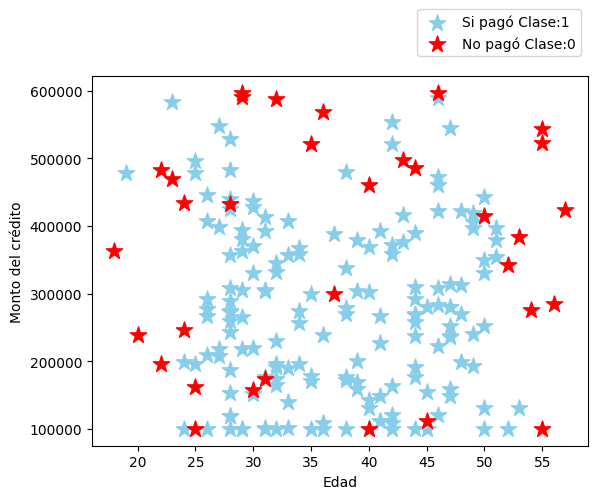

In [17]:
#Graficar clientes cumplidos y no cumplidos
plt.scatter(buenos['edad'], buenos['credito'] #En el eje x la edad y en el eje y el credito
            ,marker="*",s=150,color="skyblue",
            label="Si pagó Clase:1") 

plt.scatter(malos['edad'], malos['credito']
            ,marker="*",s=150,color="red",
            label="No pagó Clase:0")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1,1.2))
plt.show()



Preparar los datos

In [18]:
#Preparación de datos (Escalar)
datos=clientes [["edad","credito"]] #Se guardan las columnas edad y credito en la variable datos
clase=clientes["cumplio"] #Se guarda la columna cumplio en la variable clase
escalador=preprocessing.MinMaxScaler() #Se crea un minmaxscaler para escalar los datos los mas pequeñs 0 y los mas grandes 1
datos=escalador.fit_transform(datos)  #ajuste y transformacion de los datos
datos

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

Clasificador

In [19]:
#Cración del modelo
clasificador=KNeighborsClassifier(n_neighbors=3) #Se crea un clasificador de knn con 3 vecinos
clasificador.fit(datos,clase) #Se ajusta el clasificador con los datos y la clase


KNeighborsClassifier(n_neighbors=3)

Creación de una nueva entrada para probar el modelo

Clase [1]
Probabilidades por Clase: [[0. 1.]]


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


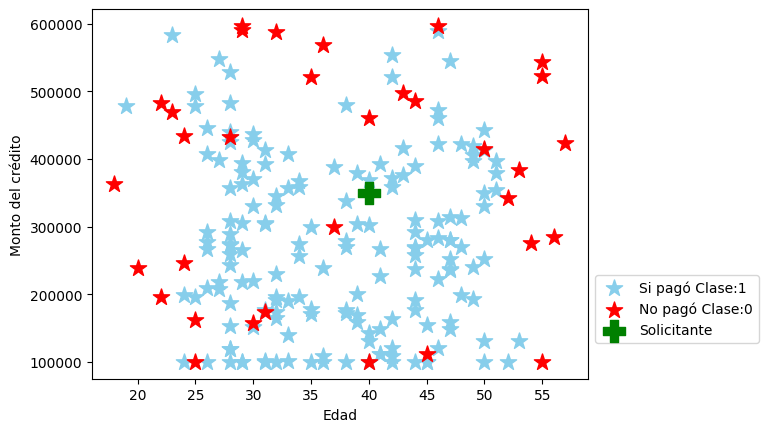

In [20]:
edad=40
monto=350000

#Escalar los datos del nuevo cliente
solicitante=escalador.transform([[edad,monto]])
print("Clase",clasificador.predict(solicitante))
print("Probabilidades por Clase:",clasificador.predict_proba(solicitante))


#clase y probabilidades

#Grafica
plt.scatter(buenos['edad'], buenos['credito'],
            marker="*",s=150,color="skyblue",
            label="Si pagó Clase:1")
plt.scatter(malos['edad'], malos['credito'],
            marker="*",s=150,color="red",
            label="No pagó Clase:0")
plt.scatter(edad,monto,marker="P",s=250,color="green",label="Solicitante")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1,0.3))
plt.show()

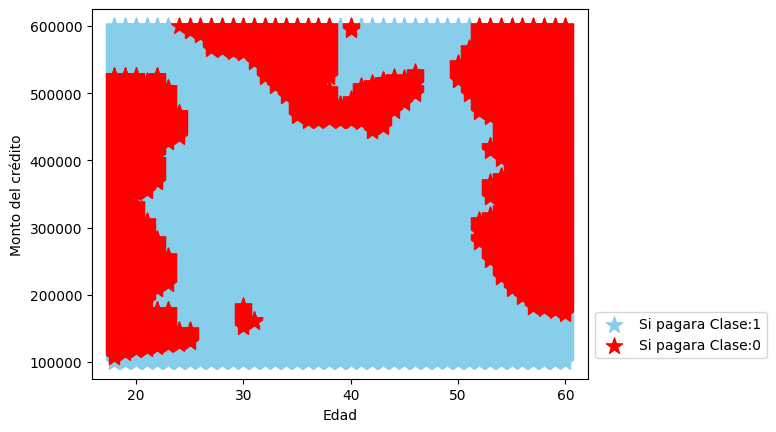

In [21]:
#Regiones
#Graficar clientes cumplidos y no cumplidos
#Crear una matriz de datos sisntetico con todas las edades y todos los montos de credito
creditos=np.array([np.arange(100000,600010,1000)]*43).reshape(1,-1)
edades=np.array([np.arange(18,61)]*501).reshape(1,-1)
#Unir las dos matrices en una sola
todos=pd.DataFrame(np.stack((edades,creditos),axis=2)[0],columns=["edad","credito"])

#Escalar los datos
solicitantes=escalador.transform(todos)
#Predecir la clase de todos los datos
clase_resultante=clasificador.predict(solicitantes)

buenos=todos[clase_resultante==1]
malos=todos[clase_resultante==0]

plt.scatter(buenos['edad'], buenos['credito'],
            marker="*",s=150,color="skyblue",label="Si pagara Clase:1") 

plt.scatter(malos['edad'], malos['credito'],
            marker="*",s=150,color="red",label="Si pagara Clase:0")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()
               